<a href="https://colab.research.google.com/github/hwankang/Defense/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%8F%AC%ED%8A%B8%ED%8F%B4%EB%A6%AC%EC%98%A4_(%ED%95%B4%EA%B5%B0%ED%95%A8%EC%A0%95_%EA%B0%80%EC%8A%A4%ED%84%B0%EB%B9%88_%EC%B6%94%EB%A0%A5%EA%B8%B0_%EC%9C%A0%EC%A7%80%EB%B3%B4%EC%88%98%2C_0908%2C_%EB%8F%99%EC%A4%80%EC%83%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 해군함정 가스터빈 추력발전기 (Naval Propulsion Plants) 시뮬레이션 데이터 분석

* Date: 2020.9.22 (화), GNTP IAI 38강
* Date: 2020.11.21 (토), KIDET Defense AI
* Date: 2020.12.4 (금), KIDET Defense AI
* Date: 2020.12.19 (토), KIDET Defense AI
* Date: 2021.1.7 (목), KIDET Defense AI
* Date: 2021.3.31 (수), GNU AI
* Date: 2021.6.17 (목), KOMIPO Bigdata
* Date: 2021.9.7 (화), KIDET Defense AI

* Author: Jason Dong / 동준상 (naebon1@gamil.com)

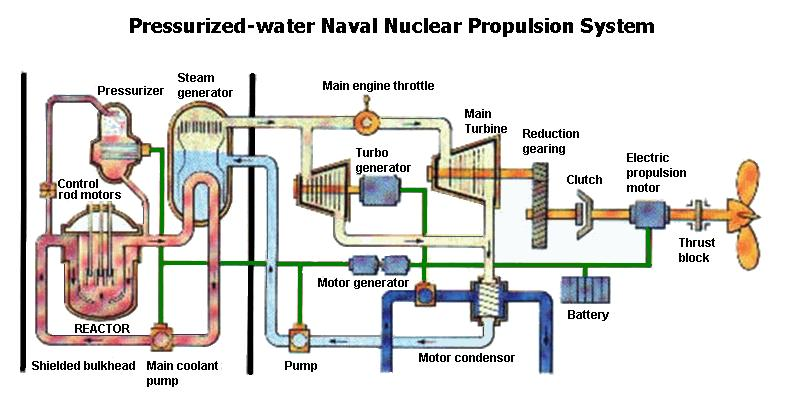

### 해군 함정용 가스터빈 엔진 시뮬레이터 생성 데이터 (CODLAG 타입 추력 발전기)
* Data have been generated from a sophisticated simulator 
* of a Gas Turbines (GT), mounted on a Frigate characterized by 
* a COmbined Diesel eLectric And Gas (CODLAG) propulsion plant type.


#### 추력 시스템 성능 파라미터 
- 함정 속도 (Ship speed, linear function of the lever position, lp)
- 컴프레서 열화 상관계수 (Compressor degradation coefficient, kMc)
- 터빈 열화 상관계수 (Turbine degradation coefficient, kMt)

#### 원본 데이터세트 링크: UCI
* https://archive.ics.uci.edu/ml/datasets/Condition+Based+Maintenance+of+Naval+Propulsion+Plants

### 데이터세트 칼럼 네임

1. 레버 위치 / Lever position (lp) [ ]
2. 함정 속도 / Ship speed (v) [knots]
3. 가스 터빈 샤프트 토크 / Gas Turbine shaft torque (GTT) [kN m]
4. 가스 터빈 회전률 / Gas Turbine rate of revolutions (GTn) [rpm]
5. 가스 발전기 회전률 / Gas Generator rate of revolutions (GGn) [rpm]
6. 표준 프로펠러 토크 / Starboard Propeller Torque (Ts) [kN]
7. 포트 프로펠러 토크 / Port Propeller Torque (Tp) [kN]
8. HP 터빈 배출 온도 / HP Turbine exit temperature (T48) [C]
9. GT 컴프레서 흡입 공기 온도 / GT Compressor inlet air temperature (T1) [C]
10. GT 컴프레서 배출 공기 온도 / GT Compressor outlet air temperature (T2) [C]
11. HP 터빈 배출 압력 / HP Turbine exit pressure (P48) [bar]
12. GT 컴프레서 흡입 공기 압력 / GT Compressor inlet air pressure (P1) [bar]
13. GT 컴프레서 배출 공기 압력 / GT Compressor outlet air pressure (P2) [bar]
14. 가스 터빈 연소 가스 압력 / Gas Turbine exhaust gas pressure (Pexh) [bar]
15. 터빈 인젝션 컨트롤 / Turbine Injecton Control (TIC) [%]
16. 연료 흐름 / Fuel flow (mf) [kg/s]
17. GT 컴프레서 열화 상태 상관계수 / GT Compressor decay state coefficient (kMc)
18. GT 터빈 열화 상태 상관계수 / GT Turbine decay state coefficient (kMt)

### 1. 라이브러리 임포트

In [1]:
# 파이썬 데이터 활용, 시각화 라이브러리
# numpy
# pandas
# matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# 훈련 데이터와 검증 데이터 분할
from sklearn.model_selection import train_test_split

# 데이터 정규화 (정규화 & 표준화)
from sklearn.preprocessing import StandardScaler

# 머신러닝 학습모델 (회귀분석, 지도식 학습)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 모델 성능 검증 지표
from sklearn.metrics import r2_score

In [6]:
# 데이터 임포트1. 런타임
# import data
# read_csv()
data = pd.read_csv("naval_gas_turbine_data.csv", 
       names=['Lever position (lp) [ ]','Ship speed (v) [knots]','Shaft torque (GTT) [kN m]','Turbine Rate of revolutions (GTn) [rpm]','Generator rate of revolutions (GGn) [rpm]','Starboard Propeller Torque (Ts) [kN]','Port Propeller Torque (Tp) [kN]','HP Turbine exit temp (T48) [C]','GT Compressor inlet air temp (T1) [C]',
              'GT Compressor outlet air temp (T2) [C]','HP Turbine exit pressure (P48) [bar]','GT Compressor inlet air pressure (P1) [bar]','GT Compressor outlet air pressure (P2) [bar]','Gas Turbine exhaust gas pressure (Pexh) [bar]','Turbine Injecton Control (TIC) [%]','Fuel flow (mf) [kg/s]','GT Compressor decay coef [kMc]','GT Turbine decay coef [kMt]'])

# see the first 10 lines of data
# head()
data.head(5)

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
0,1.14,3.0,290.0,1350.0,6680.0,7.58,7.58,464.0,288.0,551.0,1.10,0.998,5.95,1.02,7.14,0.082,0.95,0.975
1,2.09,6.0,6960.0,1380.0,6830.0,28.20,28.20,635.0,288.0,582.0,1.33,0.998,7.28,1.02,10.70,0.287,0.95,0.975
2,3.14,9.0,8380.0,1390.0,7110.0,60.40,60.40,606.0,288.0,588.0,1.39,0.998,7.57,1.02,13.10,0.259,0.95,0.975
3,4.16,12.0,14700.0,1550.0,7790.0,114.00,114.00,661.0,288.0,614.0,1.66,0.998,9.01,1.02,18.10,0.358,0.95,0.975
4,5.14,15.0,21600.0,1920.0,8490.0,175.00,175.00,731.0,288.0,646.0,2.08,0.998,11.20,1.03,26.40,0.522,0.95,0.975


In [7]:
data.tail(5)

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
11929,5.14,15.0,21600.0,1920.0,8470.0,175.0,175.0,682.0,288.0,629.0,2.09,0.998,11.0,1.03,23.8,0.471,1.0,1.0
11930,6.18,18.0,29800.0,2310.0,8800.0,246.0,246.0,747.0,288.0,659.0,2.51,0.998,13.1,1.03,32.7,0.647,1.0,1.0
11931,7.15,21.0,39000.0,2680.0,9120.0,332.0,332.0,796.0,288.0,680.0,2.98,0.998,15.4,1.04,42.1,0.834,1.0,1.0
11932,8.21,24.0,51000.0,3090.0,9300.0,438.0,438.0,893.0,288.0,722.0,3.59,0.998,18.3,1.04,58.1,1.150,1.0,1.0
11933,9.30,27.0,72800.0,3560.0,9740.0,645.0,645.0,1040.0,288.0,768.0,4.53,0.998,22.5,1.05,86.1,1.700,1.0,1.0


In [ ]:
# 데이터 임포트2. 구글 드라이브
# 구글 드라이브에 dataset 폴더를 만들고 대상 파일 업로드
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#data = pd.read_csv("/content/drive/My Drive/dataset/insurance.csv")
#data.head(15)

In [ ]:
#info()
data.###()

In [ ]:
str(len(data))+'개의 인스턴스 존재'

In [8]:
#describe()
data.describe()

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.167778,15.000000,27249.165996,2137.177811,8200.955254,227.297807,227.297807,735.495726,288.0,646.215100,2.353415,9.980000e-01,12.297610,1.030000,33.641437,0.662556,0.97500,0.9875
std,2.627068,7.746291,22159.091763,774.184863,1091.297870,200.487306,200.487306,173.680016,0.0,72.676721,1.084821,2.533635e-13,5.337468,0.010541,25.841674,0.507320,0.01472,0.0075
min,1.140000,3.000000,254.000000,1310.000000,6590.000000,5.300000,5.300000,442.000000,288.0,540.000000,1.090000,9.980000e-01,5.830000,1.020000,0.000000,0.068000,0.95000,0.9750
25%,3.140000,9.000000,8380.000000,1390.000000,7060.000000,60.300000,60.300000,590.000000,288.0,578.000000,1.390000,9.980000e-01,7.450000,1.020000,13.700000,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21600.000000,1920.000000,8480.000000,175.000000,175.000000,706.000000,288.0,637.000000,2.080000,9.980000e-01,11.100000,1.030000,25.300000,0.496000,0.97500,0.9875
75%,7.150000,21.000000,39000.000000,2680.000000,9130.000000,332.000000,332.000000,834.000000,288.0,694.000000,2.980000,9.980000e-01,15.700000,1.040000,44.600000,0.882000,0.98800,0.9940
max,9.300000,27.000000,72800.000000,3560.000000,9800.000000,645.000000,645.000000,1120.000000,288.0,789.000000,4.560000,9.980000e-01,23.100000,1.050000,92.600000,1.830000,1.00000,1.0000


### 데이터세트 분리 (훈련 데이터와 검증 데이터로 분리)

In [9]:
#define y as being the "GT Compressor decay coef" from the original dataset
gt_comp_decay_coef = data[['GT Compressor decay coef [kMc]']].copy()
gt_comp_decay_coef[2500:2510]

,GT Compressor decay coef [kMc]
2500,0.96
2501,0.96
2502,0.96
2503,0.96
2504,0.96
2505,0.96
2506,0.96
2507,0.96
2508,0.96
2509,0.96


In [10]:
#define y as being the "GT Turbine decay coef" from the original dataset
gt_turb_decay_coef = data[['GT Turbine decay coef [kMt]']].copy()
gt_turb_decay_coef[5500:5510]

,GT Turbine decay coef [kMt]
5500,0.988
5501,0.988
5502,0.988
5503,0.988
5504,0.988
5505,0.988
5506,0.988
5507,0.988
5508,0.989
5509,0.989


In [12]:
#Test train split
X_final = data

#gt_comp_decay_coef부터 분석 시행
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_final, gt_comp_decay_coef, test_size = 0.33, random_state = 0 )

#X_train, X_test, y_train, y_test = train_test_split(data[['age']], y_final, test_size = 0.33, random_state = 0 )

In [13]:
X_train[:5]

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
5747,6.18,18.0,29800.0,2310.0,8820.0,246.0,246.0,772.0,288.0,667.0,2.51,0.998,13.20,1.03,34.1,0.676,0.974,0.989
7847,9.30,27.0,72800.0,3560.0,9750.0,645.0,645.0,1070.0,288.0,775.0,4.52,0.998,22.70,1.05,88.6,1.750,0.983,0.988
3698,9.30,27.0,72800.0,3560.0,9780.0,645.0,645.0,1080.0,288.0,781.0,4.49,0.998,22.40,1.05,89.3,1.770,0.965,0.995
1690,8.21,24.0,51000.0,3090.0,9320.0,438.0,438.0,942.0,288.0,739.0,3.58,0.998,18.50,1.04,61.7,1.220,0.957,0.980
5475,4.16,12.0,14700.0,1550.0,7760.0,114.0,114.0,642.0,288.0,607.0,1.66,0.998,8.94,1.02,17.3,0.342,0.973,0.985


In [14]:
X_test[:5]

,Lever position (lp) [ ],Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor inlet air temp (T1) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay coef [kMc],GT Turbine decay coef [kMt]
8784,1.14,3.0,1310.0,1370.0,6650.0,8.74,8.74,471.0,288.0,547.0,1.14,0.998,6.11,1.02,2.17,0.096,0.987,0.989
5313,4.16,12.0,14700.0,1550.0,7780.0,114.00,114.00,635.0,288.0,606.0,1.66,0.998,8.87,1.02,16.90,0.335,0.972,0.993
5094,1.14,3.0,7090.0,1380.0,6700.0,9.04,9.04,641.0,288.0,574.0,1.33,0.998,7.15,1.02,3.48,0.300,0.971,0.995
3652,8.21,24.0,51000.0,3090.0,9320.0,438.00,438.00,926.0,288.0,734.0,3.57,0.998,18.40,1.04,60.40,1.200,0.965,0.990
10324,2.09,6.0,6960.0,1380.0,6740.0,28.50,28.50,612.0,288.0,572.0,1.34,0.998,7.28,1.02,8.57,0.270,0.994,0.978


In [15]:
y_train[:5]

,GT Compressor decay coef [kMc]
5747,0.974
7847,0.983
3698,0.965
1690,0.957
5475,0.973


In [16]:
y_test[:5]

,GT Compressor decay coef [kMc]
8784,0.987
5313,0.972
5094,0.971
3652,0.965
10324,0.994


### 데이터 시각화

##### 고도로 절제된 시뮬레이터 생성 데이터인 관계로 
##### 데이터 요소 간의 색다른 관련성, 이상점 발견하기 어려움

* sns.heatmap()
* sns.piarplot()

In [17]:
#분석 대상이 아닌 데이터 제거
#drop()

minimal_data = data.drop([
    'Lever position (lp) [ ]',
    'GT Compressor inlet air temp (T1) [C]', 
    'GT Compressor inlet air pressure (P1) [bar]',
    'GT Compressor decay coef [kMc]',
    'GT Turbine decay coef [kMt]'],
    axis=1)

In [18]:
minimal_data

,Ship speed (v) [knots],Shaft torque (GTT) [kN m],Turbine Rate of revolutions (GTn) [rpm],Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temp (T48) [C],GT Compressor outlet air temp (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s]
0,3.0,290.0,1350.0,6680.0,7.58,7.58,464.0,551.0,1.10,5.95,1.02,7.14,0.082
1,6.0,6960.0,1380.0,6830.0,28.20,28.20,635.0,582.0,1.33,7.28,1.02,10.70,0.287
2,9.0,8380.0,1390.0,7110.0,60.40,60.40,606.0,588.0,1.39,7.57,1.02,13.10,0.259
3,12.0,14700.0,1550.0,7790.0,114.00,114.00,661.0,614.0,1.66,9.01,1.02,18.10,0.358
4,15.0,21600.0,1920.0,8490.0,175.00,175.00,731.0,646.0,2.08,11.20,1.03,26.40,0.522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,15.0,21600.0,1920.0,8470.0,175.00,175.00,682.0,629.0,2.09,11.00,1.03,23.80,0.471
11930,18.0,29800.0,2310.0,8800.0,246.00,246.00,747.0,659.0,2.51,13.10,1.03,32.70,0.647
11931,21.0,39000.0,2680.0,9120.0,332.00,332.00,796.0,680.0,2.98,15.40,1.04,42.10,0.834
11932,24.0,51000.0,3090.0,9300.0,438.00,438.00,893.0,722.0,3.59,18.30,1.04,58.10,1.150


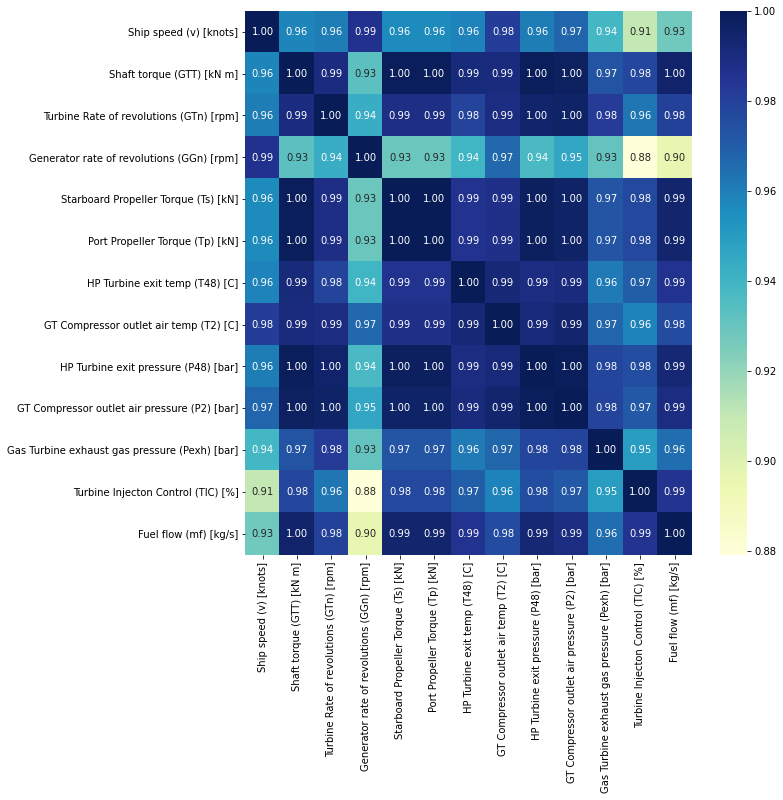

In [19]:
import seaborn as sns
%matplotlib inline

# heatmap()

plt.figure(figsize=(10,10))
sns.heatmap(minimal_data.corr(),annot=True, fmt=".2f", cmap="YlGnBu")

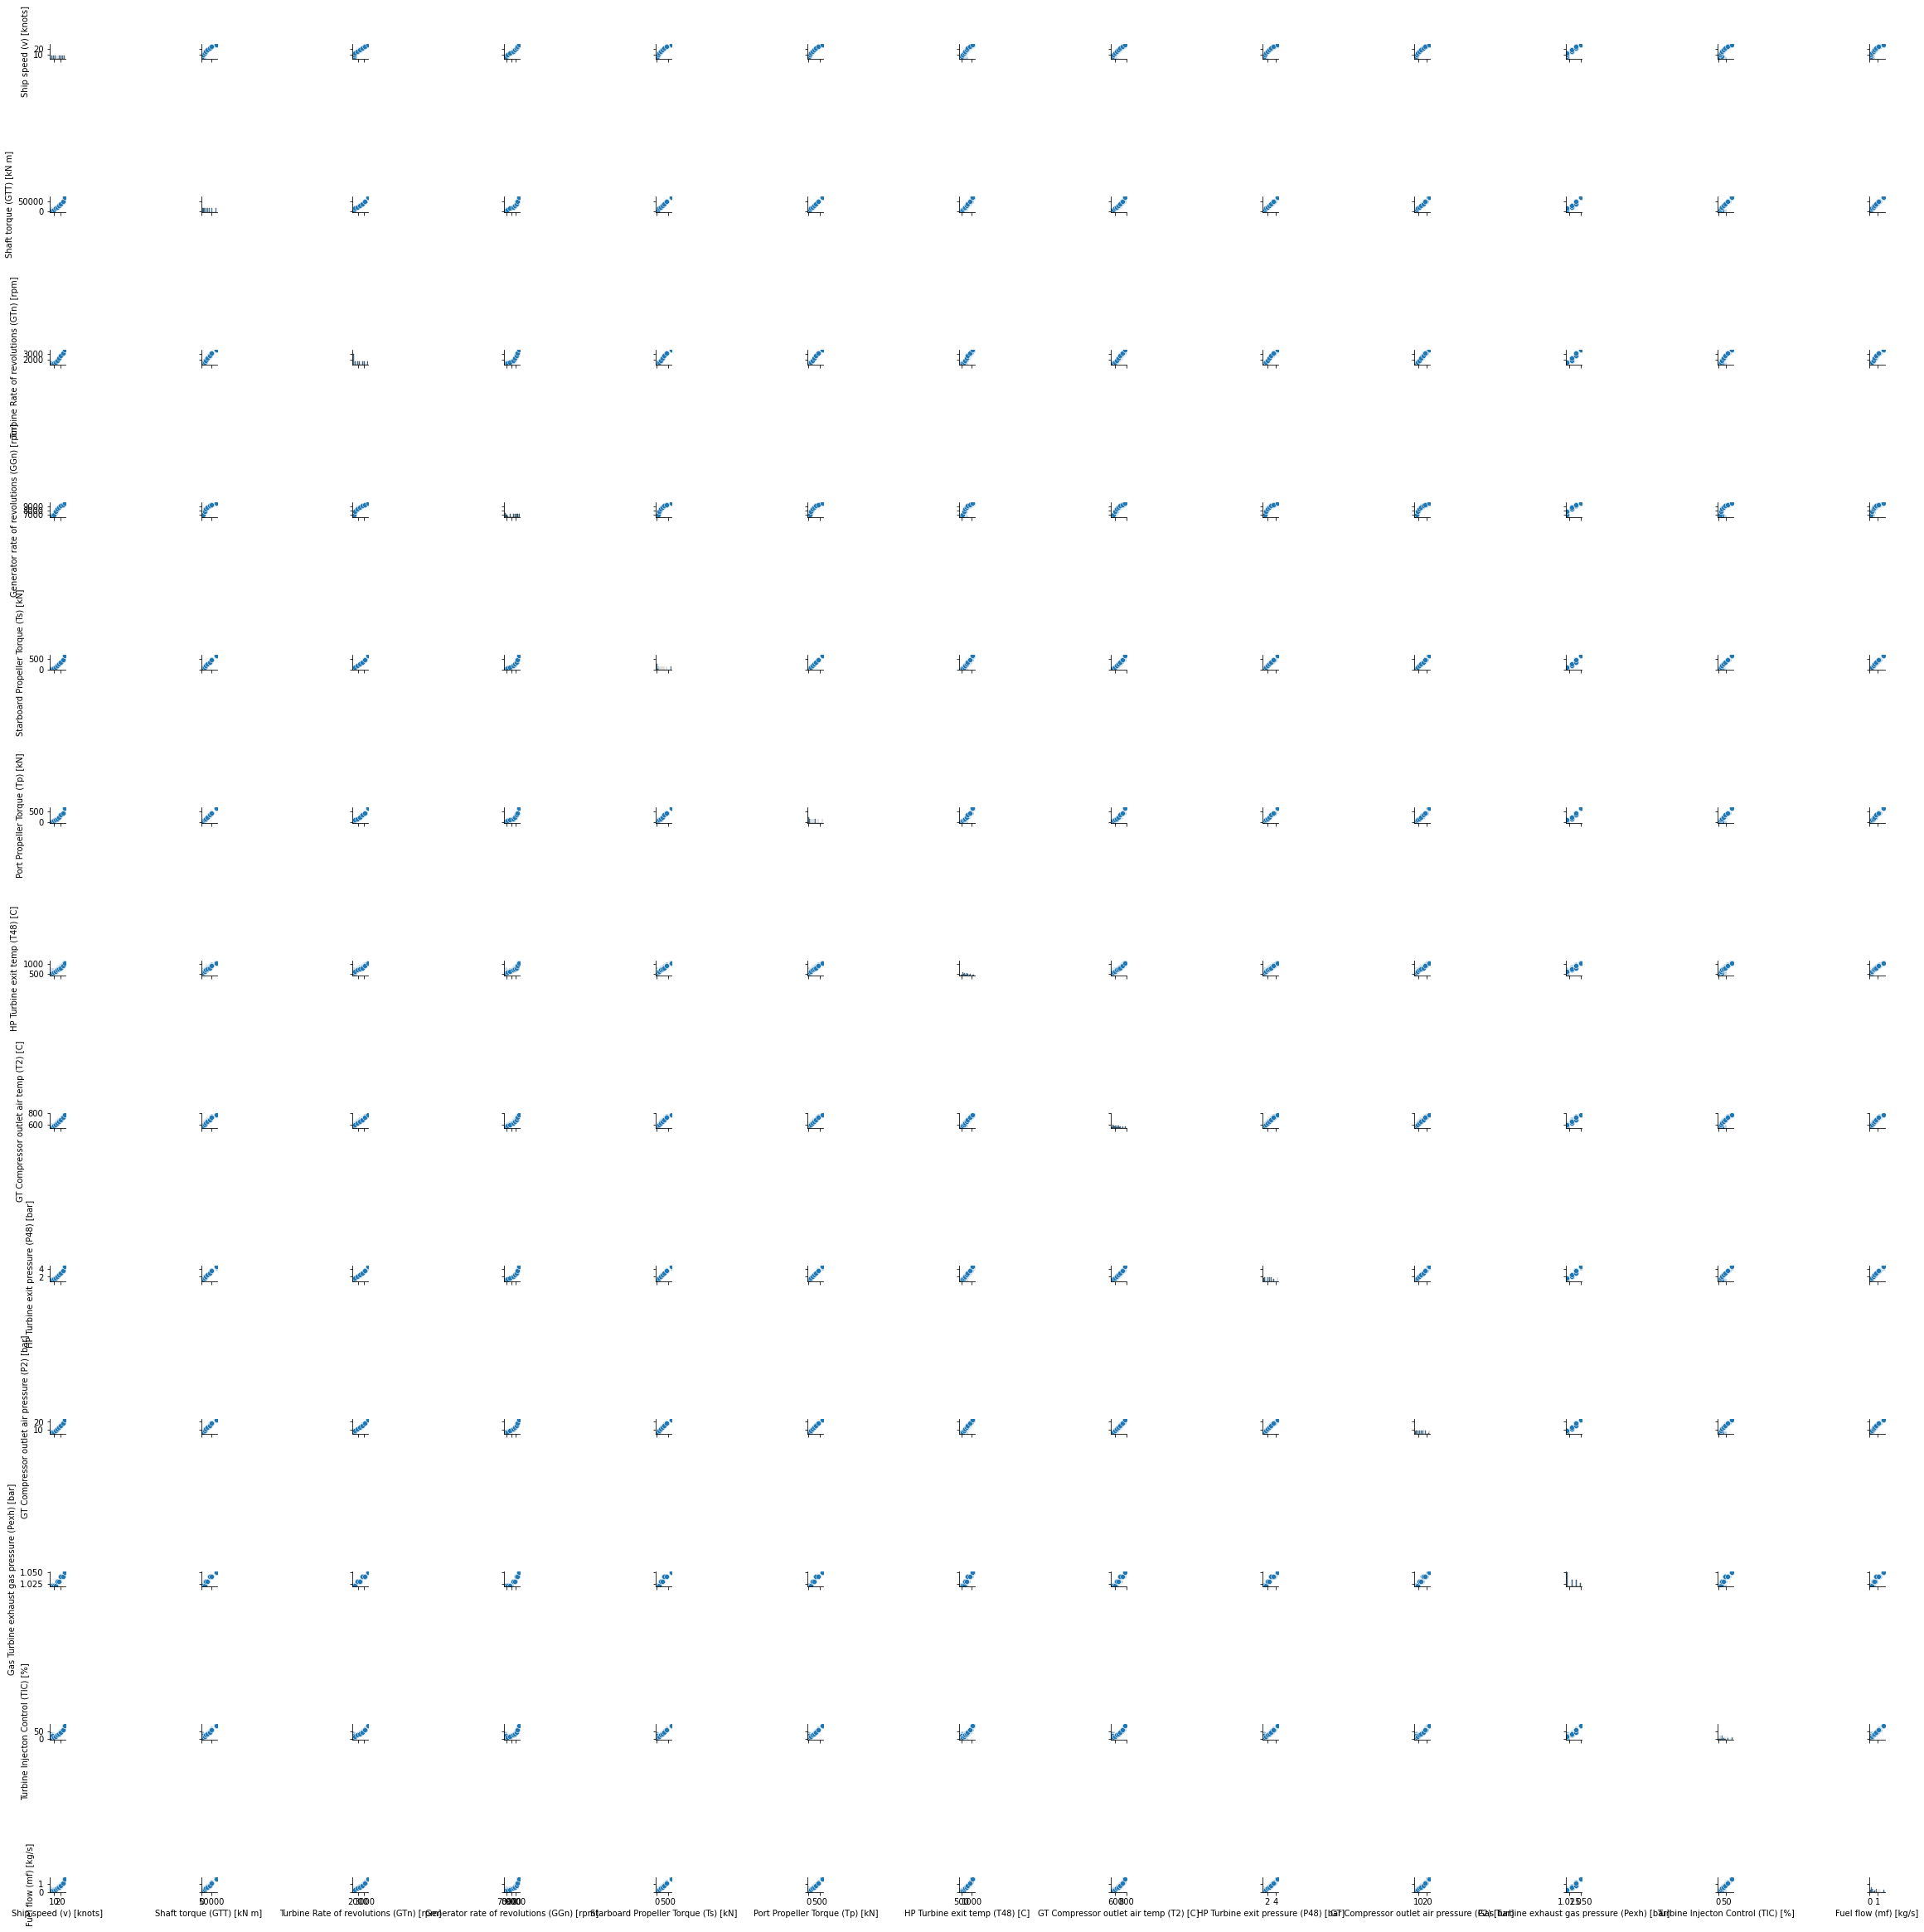

In [20]:
# pairplot()

sns.pairplot(minimal_data)

### 6. 특성치 정규화 (또는 표준화)

In [ ]:
#standard scaler (fit transform on train, fit only on test)
#s_scaler = StandardScaler()
#X_train = s_scaler.fit_transform(X_train.astype(np.float))
#X_test= s_scaler.transform(X_test.astype(np.float))

### 7. ML 모델 기반 예측

#### 1) 다항회귀모델 / PolynomialRegression

In [21]:
#PolynomialFeatures()
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X_final)
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
  poly_lr.score(X_train,y_train),
  poly_lr.score(X_test, y_test)))

poly train score 1.000, poly test score: 1.000


#### 2) 의사결정수 회귀모델 / DecisionTreeRegressor

In [22]:
dt = DecisionTreeRegressor(random_state=0)
dt = dt.fit(X_train,y_train.values.ravel())

# predict()
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
  dt.score(X_train,y_train),
  dt.score(X_test, y_test)))

dt train score 1.000, dt test score: 1.000


#### 3) 랜덤포레스트 회귀모델 / RandomForestRegressor

In [ ]:
# fit()
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.###(X_train,y_train.values.ravel())

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
  forest.score(X_train,y_train),
  forest.score(X_test, y_test)))